# Initialize

## Package Installation

In [ ]:
!pip install cupy

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=d81240561619e7f8fdcd7f2e31496ee64b244db63e717e17d2ccaa306ff5d3d2
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


## Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pickle as pkl

from geneticalgorithm import geneticalgorithm as ga
from sklearn.tree import DecisionTreeClassifier
import warnings

In [3]:
def saveobj(object, filename):
    filehandler = open(filename + '.fck', 'wb')
    pkl.dump(object, filehandler)

def loadobj(filename):
    filehandler = open(filename + '.fck', 'rb')
    ret = pkl.load(filehandler)
    return ret


## Import Dataset

In [ ]:
!rm -rf *
!git clone https://github.com/hmda77/Ensemble-Indoor-Loc.git

Cloning into 'Ensemble-Indoor-Loc'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 72 (delta 27), reused 25 (delta 10), pack-reused 0
Receiving objects: 100% (72/72), 1.03 MiB | 1.89 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [ ]:
!mv /content/Ensemble-Indoor-Loc/JUIndoorLoc/JUIndoorLoc-Test-data.csv /content/
!mv /content/Ensemble-Indoor-Loc/JUIndoorLoc/JUIndoorLoc-Training-data.csv /content/
!rm -rf /content/Ensemble-Indoor-Loc/

In [7]:
tr_path = "C:\\Users\Hamid\content\JUIndoorLoc-Training-data.csv"
ts_path = "C:\\Users\Hamid\content\JUIndoorLoc-Test-data.csv"

# tr_path = "/content/JUIndoorLoc-Training-data.csv"
# ts_path = "/content/JUIndoorLoc-Test-data.csv"

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Hamid\AppData\Local\Temp\ipykernel_8924\3251032818.py:1: SyntaxWarning: invalid escape sequence '\H'
  tr_path = "C:\\Users\Hamid\content\JUIndoorLoc-Training-data.csv"
C:\Users\Hamid\AppData\Local\Temp\ipykernel_8924\3251032818.py:2: SyntaxWarning: invalid escape sequence '\H'
  ts_path = "C:\\Users\Hamid\content\JUIndoorLoc-Test-data.csv"


## Prepare Data

In [8]:
data_train = pd.read_csv(tr_path)
data_train.head(5)
data_test = pd.read_csv(ts_path)
data_test.head(5)

,Cid,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,AP167,AP168,AP169,AP170,AP171,AP172,Rs,Hpr,Did,Ts
0,L4-33-13,-77,-58,-66,-64,-92,-66,-66,-93,-93,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489813137748
1,L4-33-13,-90,-58,-78,-56,-92,-74,-74,-87,-93,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489813179138
2,L4-33-13,-80,-64,-78,-56,-92,-74,-74,-87,-93,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489812948443
3,L4-33-13,-72,-60,-74,-58,-93,-75,-76,-95,-93,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489812959103
4,L4-33-13,-82,-56,-74,-56,-93,-71,-76,-89,-110,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489813079167


In [9]:
frames = [data_train, data_test]
df = pd.concat(frames)
df.head(5)

,Cid,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,AP167,AP168,AP169,AP170,AP171,AP172,Rs,Hpr,Did,Ts
0,L4-40-1,-84,-80,-71,-58,-110,-72,-71,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1469870570949
1,L4-40-1,-84,-79,-71,-58,-110,-72,-71,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1470047205646
2,L4-40-1,-110,-110,-70,-56,-110,-69,-68,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1469870932338
3,L4-40-1,-110,-110,-70,-53,-110,-69,-68,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1470047629440
4,L4-37-2,-84,-82,-75,-65,-110,-73,-75,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,D4,1469876622694


In [10]:
df['Did'] = df['Did'].astype(str).str[1]
df['Did'] = pd.to_numeric(df['Did'])


In [11]:
data_combined = df.drop('Cid', axis=1).reset_index(drop=True)
data_combined = data_combined.drop('Ts', axis=1)

# GA

## RF, Simple Score

In [ ]:
warnings.filterwarnings("ignore")

# Define the search space
varbound = np.array([[1, 100], [1, 5]])

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0])
    n_learners = int(params[1])

    # Create AdaBoost model with specified hyperparameters
    model = AdaBoostClassifier(
        n_estimators=n_learners,
        estimator=DecisionTreeClassifier(max_depth=max_depth, random_state=42),
        random_state=42,
    )

    # Evaluate the model using cross-validation
    scores = cross_val_score(model, data_combined, df['Cid'], cv=3, scoring='accuracy',n_jobs=-1)

    # Return the negative mean accuracy as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, score = {np.mean(scores)})")
    return -np.mean(scores)

algorithm_param = {'max_num_iteration': 5,\
                   'population_size':10,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

# # Create an instance of the geneticalgorithm algorithm class
# algorithm_param = {'max_num_iteration': 5, 'population_size': 2, 'mutation_probability': 0.1, 'elit_ratio': 0.01,
#                    'crossover_probability': 0.5, 'crossover_type': 'uniform', 'max_iteration_without_improv': 5}
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout = 15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()
# Get the best parameters
best_params = model.output_dict['variable']

# Print the best parameters
print("Best Parameters:", best_params)


## RF, Score and time, Coars

(max depth:50, n_learner: 80, scores = 0.9476029528850395, elapsed_time = 47.102142095565796, total_score = 0.4765815319293815)
(max depth:30, n_learner: 60, scores = 0.928599802710099, elapsed_time = 34.78770589828491, total_score = 0.5807227437272499)
(max depth:60, n_learner: 80, scores = 0.9481943236040303, elapsed_time = 30.57863759994507, total_score = 0.6424079476045796)
(max depth:50, n_learner: 60, scores = 0.9464990416008603, elapsed_time = 18.755311727523804, total_score = 0.7589459243256222)
(max depth:70, n_learner: 70, scores = 0.9489434572254779, elapsed_time = 26.373596668243408, total_score = 0.6852074905430439)
(max depth:90, n_learner: 110, scores = 0.948706878159426, elapsed_time = 54.86966800689697, total_score = 0.40001019809045624)
(max depth:20, n_learner: 90, scores = 0.8702891510000829, elapsed_time = 16.219383716583252, total_score = 0.7080953138342503)
(max depth:40, n_learner: 90, scores = 0.9455134594886272, elapsed_time = 26.681029558181763, total_score =

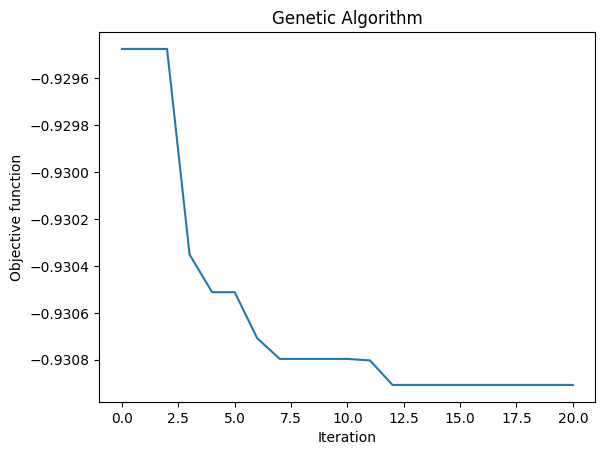

Best Parameters: [100.  68.]


In [ ]:
import numpy as np
import warnings
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from geneticalgorithm import geneticalgorithm as ga

warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[10, 100], [60, 120]])

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0]/10)*10
    n_learners = int(params[1] / 10) * 10

    # Create RandomForest model with specified hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_learners,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1  # Utilize all available CPU cores
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, data_combined, df['Cid'], cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

    elapsed_time = time.time() - start_time

    # Return a tuple containing both scores and elapsed time
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, scores = {np.mean(scores)}, elapsed_time = {elapsed_time}, total_score = {np.mean(scores)-0.01*elapsed_time})")
    return -np.mean(scores)+0.001*elapsed_time

algorithm_param = {'max_num_iteration': 20,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)


## Rf,Score and time, Fine, itr=20, pop = 20

(max depth:39, n_learner: 72, scores = 0.9462230707749191, elapsed_time = 21.715770959854126, total_score = 0.7290653611763778)
(max depth:126, n_learner: 25, scores = 0.946853809936787, elapsed_time = 10.31783676147461, total_score = 0.843675442322041)
(max depth:6, n_learner: 40, scores = 0.252010908071235, elapsed_time = 4.967480182647705, total_score = 0.20233610624475795)
(max depth:8, n_learner: 36, scores = 0.36693761500824656, elapsed_time = 4.881983995437622, total_score = 0.31811777505387034)
(max depth:102, n_learner: 58, scores = 0.9492588338015157, elapsed_time = 21.99994921684265, total_score = 0.7292593416330891)
(max depth:127, n_learner: 95, scores = 0.9485491712177976, elapsed_time = 40.42435073852539, total_score = 0.5443056638325436)
(max depth:35, n_learner: 116, scores = 0.9439757585152212, elapsed_time = 33.81715226173401, total_score = 0.6058042358978811)
(max depth:108, n_learner: 120, scores = 0.9487462978997295, elapsed_time = 68.82128238677979, total_score =

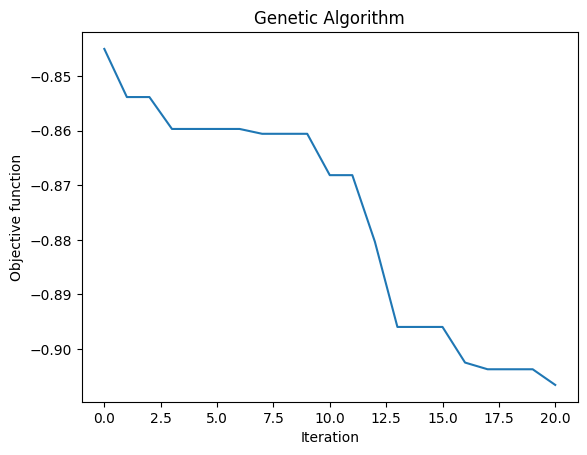

Best Parameters: [57. 12.]


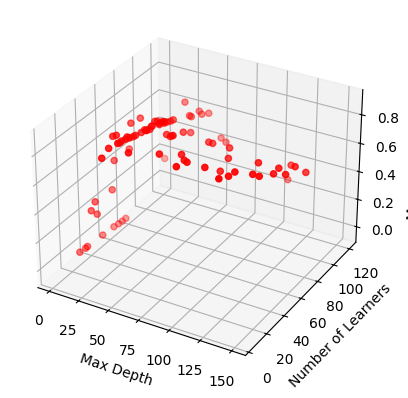

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from geneticalgorithm import geneticalgorithm as ga

warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[1, 150], [1, 120]])

# Store mean total score for each combination of max_depth and n_learners
total_score_mean = {}

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0] )
    n_learners = int(params[1])

    # Create RandomForest model with specified hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_learners,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1  # Utilize all available CPU cores
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, data_combined, df['Cid'], cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

    elapsed_time = time.time() - start_time

    # Calculate total score
    total_score = np.mean(scores) - 0.01 * elapsed_time

    # Update mean total score for the current combination of max_depth and n_learners
    key = (max_depth, n_learners)
    if key in total_score_mean:
        total_score_mean[key].append(total_score)
    else:
        total_score_mean[key] = [total_score]

    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, scores = {np.mean(scores)}, elapsed_time = {elapsed_time}, total_score = {total_score})")
    return -total_score

algorithm_param = {'max_num_iteration': 20,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()


## Rf,Score and time, Fine, itr=50, pop = 20

(max depth:51, n_learner: 82, scores = 0.9485491852080048, elapsed_time = 44.72672462463379, total_score = 0.501281938961667)
(max depth:81, n_learner: 64, scores = 0.9490616838025719, elapsed_time = 23.98018217086792, total_score = 0.7092598620938928)
(max depth:141, n_learner: 43, scores = 0.948470299093374, elapsed_time = 15.494534015655518, total_score = 0.7935249589368188)
(max depth:1, n_learner: 8, scores = 0.009422847528520321, elapsed_time = 1.247025728225708, total_score = -0.0030474097537367597)
(max depth:97, n_learner: 69, scores = 0.948864580437652, elapsed_time = 26.54288411140442, total_score = 0.6834357393236078)
(max depth:60, n_learner: 110, scores = 0.9484703457273977, elapsed_time = 49.82301354408264, total_score = 0.4502402102865713)
(max depth:124, n_learner: 44, scores = 0.9485491432373835, elapsed_time = 22.275702714920044, total_score = 0.7257921160881831)
(max depth:56, n_learner: 16, scores = 0.942595820444272, elapsed_time = 5.623712539672852, total_score =

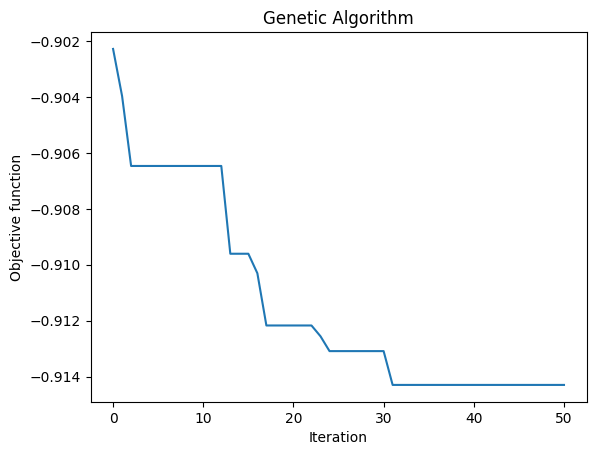

Best Parameters: [77.  8.]


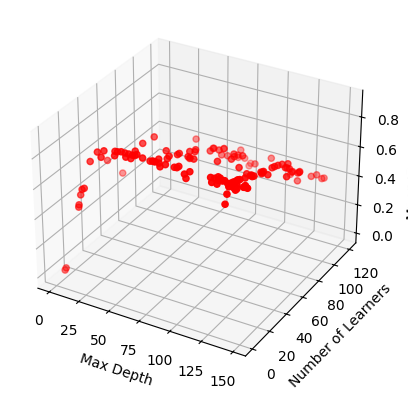

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from geneticalgorithm import geneticalgorithm as ga

warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[1, 150], [1, 120]])

# Store mean total score for each combination of max_depth and n_learners
total_score_mean = {}

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0] )
    n_learners = int(params[1])

    # Create RandomForest model with specified hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_learners,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1  # Utilize all available CPU cores
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, data_combined, df['Cid'], cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

    elapsed_time = time.time() - start_time

    # Calculate total score
    total_score = np.mean(scores) - 0.01 * elapsed_time

    # Update mean total score for the current combination of max_depth and n_learners
    key = (max_depth, n_learners)
    if key in total_score_mean:
        total_score_mean[key].append(total_score)
    else:
        total_score_mean[key] = [total_score]

    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, scores = {np.mean(scores)}, elapsed_time = {elapsed_time}, total_score = {total_score})")
    return -total_score

algorithm_param = {'max_num_iteration': 50,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()


## Recall+Precision-a*time

### Random Forest

(max depth:38, n_learner: 42, recall = 0.9414918782526416, precision = 0.9445917310163361, elapsed_time = 31.66494107246399, total_score = 1.5694341985443376)
(max depth:64, n_learner: 69, recall = 0.9481548651632234, precision = 0.9513834249908409, elapsed_time = 25.81203579902649, total_score = 1.6414179321637996)
(max depth:27, n_learner: 75, recall = 0.9210692319823371, precision = 0.9277832386203448, elapsed_time = 16.65697479248047, total_score = 1.6822827226778774)
(max depth:98, n_learner: 117, recall = 0.9482731430373758, precision = 0.9514600661093624, elapsed_time = 63.84174132347107, total_score = 1.2613157959120274)
(max depth:139, n_learner: 51, recall = 0.9486279766598328, precision = 0.9521146592318914, elapsed_time = 20.285410404205322, total_score = 1.697888531849671)
(max depth:43, n_learner: 10, recall = 0.9296640908374073, precision = 0.9335539343411746, elapsed_time = 10.496312856674194, total_score = 1.7582548966118399)
(max depth:104, n_learner: 16, recall = 0.9

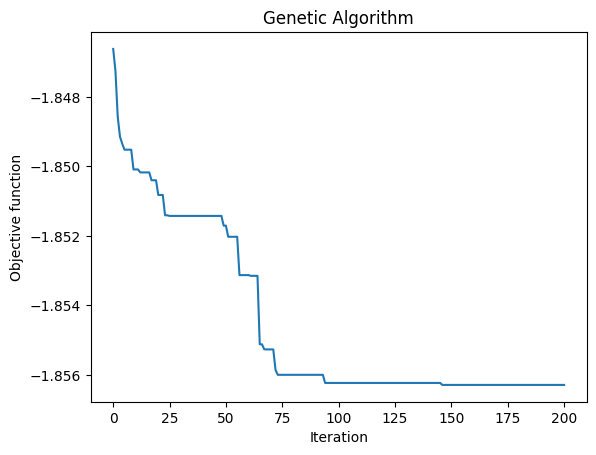

Best Parameters: [69.  9.]


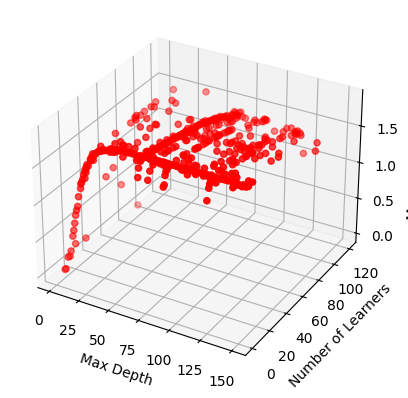

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import recall_score, precision_score

warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[1, 150], [1, 120]])

# Store mean total score for each combination of max_depth and n_learners
total_score_mean = {}

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0])
    n_learners = int(params[1])

    # Create RandomForest model with specified hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_learners,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1  # Utilize all available CPU cores
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    y_true = df['Cid']
    y_pred = cross_val_predict(model, data_combined, y_true, cv=stratified_kfold, n_jobs=-1)

    # Calculate recall and precision
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')

    elapsed_time = time.time() - start_time

    # Calculate total score
    total_score = recall + precision - 0.01 * elapsed_time

    # Update mean total score for the current combination of max_depth and n_learners
    key = (max_depth, n_learners)
    if key in total_score_mean:
        total_score_mean[key].append(total_score)
    else:
        total_score_mean[key] = [total_score]

    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, recall = {recall}, precision = {precision}, elapsed_time = {elapsed_time}, total_score = {total_score})")
    return -total_score

algorithm_param = {'max_num_iteration': 200,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()


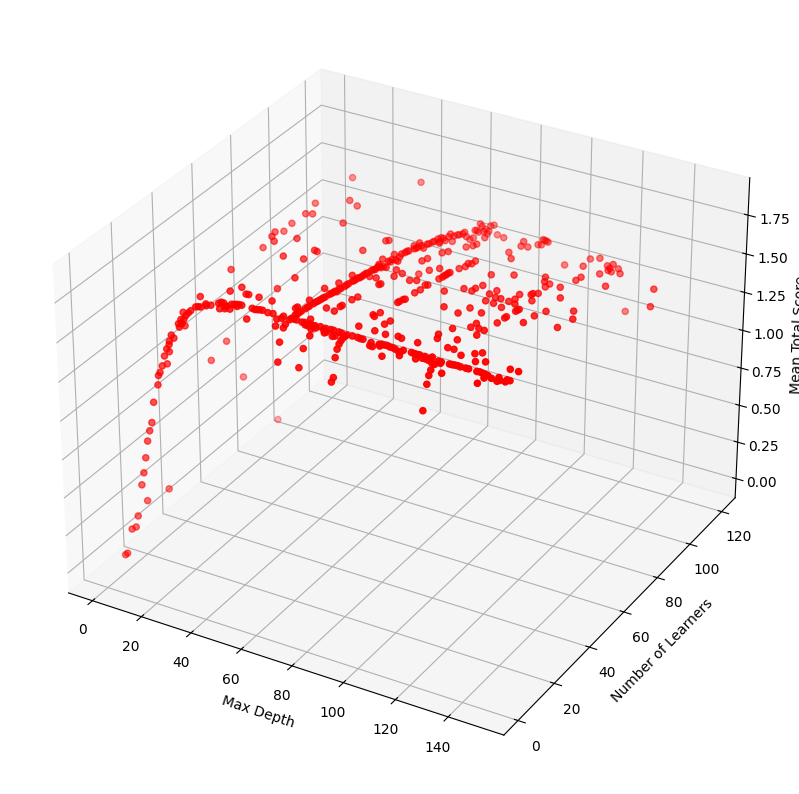

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()

In [ ]:
import plotly.graph_objects as go

# Create a 3D plot with plotly
fig = go.Figure()

# Scatter plot with smaller marker size
fig.add_trace(go.Scatter3d(
    x=mean_scores_array[:, 0],
    y=mean_scores_array[:, 1],
    z=list(mean_scores.values()),
    mode='markers',
    marker=dict(color='red', size=1),  # Adjust the size parameter
    text=[f'Max Depth: {md}, Num Learners: {nl}, Mean Total Score: {score:.2f}' for md, nl, score in zip(mean_scores_array[:, 0], mean_scores_array[:, 1], mean_scores.values())],
))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis_title='Max Depth',
        yaxis_title='Number of Learners',
        zaxis_title='Mean Total Score',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title='3D Plot of Mean Total Score',
)

# Save the plot as an HTML file
fig.write_html('3d_plot.html')


### ADABoost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import recall_score, precision_score

warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[1, 100], [1, 100]])

# Store mean total score for each combination of max_depth and n_learners
total_score_mean = {}

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0])
    n_learners = int(params[1])

    # Create RandomForest model with specified hyperparameters
    base_estimator = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model = AdaBoostClassifier(
        n_estimators=n_learners,
        estimator=base_estimator,
        algorithm='SAMME.R',
        random_state=42,
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    y_true = df['Cid']
    y_pred = cross_val_predict(model, data_combined, y_true, cv=stratified_kfold, n_jobs=-1)

    # Calculate recall and precision
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')

    elapsed_time = time.time() - start_time

    # Calculate total score
    total_score = recall + precision - 0.001 * elapsed_time

    # Update mean total score for the current combination of max_depth and n_learners
    key = (max_depth, n_learners)
    if key in total_score_mean:
        total_score_mean[key].append(total_score)
    else:
        total_score_mean[key] = [total_score]

    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, recall = {recall}, precision = {precision}, elapsed_time = {elapsed_time}, total_score = {total_score})")
    return -total_score

algorithm_param = {'max_num_iteration': 200,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()

(max depth:43, n_learner: 93, recall = 0.9382589496924775, precision = 0.9438961986182981, elapsed_time = 296.2232840061188, total_score = 1.585931864304657)
(max depth:43, n_learner: 85, recall = 0.9384166535246806, precision = 0.9443022205194194, elapsed_time = 268.3632915019989, total_score = 1.614355582542101)
(max depth:26, n_learner: 8, recall = 0.6077117173947327, precision = 0.7926556617854039, elapsed_time = 20.95839548110962, total_score = 1.379408983699027)
(max depth:2, n_learner: 90, recall = 0.017820533038952847, precision = 0.01872210430764221, elapsed_time = 145.61295533180237, total_score = -0.10907031798520732)
(max depth:87, n_learner: 59, recall = 0.9439757136098407, precision = 0.9478761778288682, elapsed_time = 237.13773036003113, total_score = 1.654714161078678)
(max depth:89, n_learner: 58, recall = 0.9429506387005204, precision = 0.9470034813181448, elapsed_time = 232.01032137870789, total_score = 1.6579437986399572)
(max depth:94, n_learner: 16, recall = 0.934

MemoryError: ignored

Best Parameters: [79, 4]


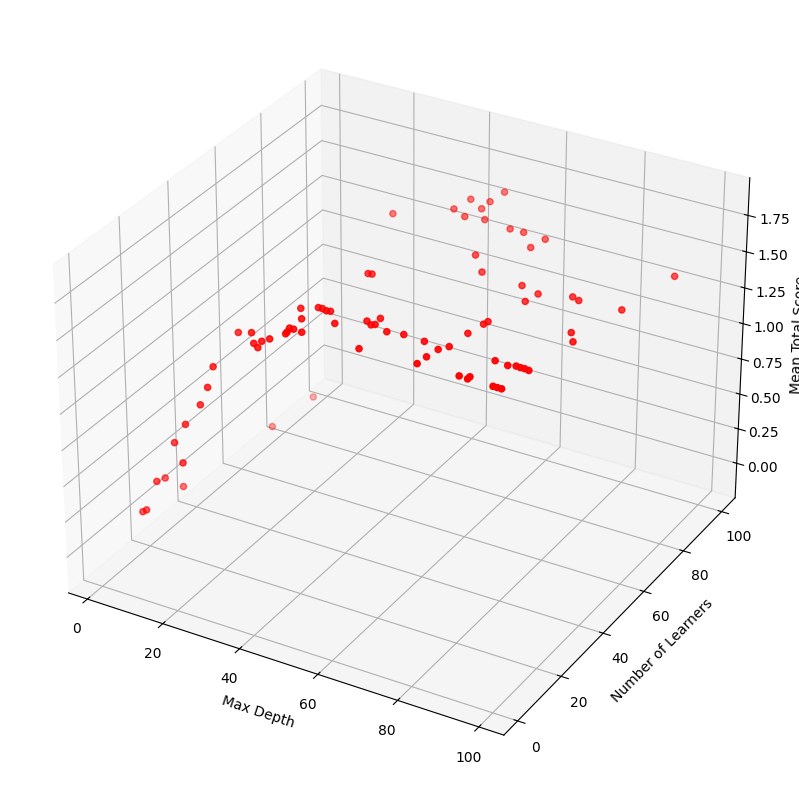

In [ ]:
print("Best Parameters: [79, 4]")

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))
# Create a 3D plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()

In [ ]:
import plotly.graph_objects as go

# Create a 3D plot with plotly
fig = go.Figure()

# Scatter plot with smaller marker size
fig.add_trace(go.Scatter3d(
    x=mean_scores_array[:, 0],
    y=mean_scores_array[:, 1],
    z=list(mean_scores.values()),
    mode='markers',
    marker=dict(color='red', size=1),  # Adjust the size parameter
    text=[f'Max Depth: {md}, Num Learners: {nl}, Mean Total Score: {score:.2f}' for md, nl, score in zip(mean_scores_array[:, 0], mean_scores_array[:, 1], mean_scores.values())],
))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis_title='Max Depth',
        yaxis_title='Number of Learners',
        zaxis_title='Mean Total Score',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title='3D Plot of Mean Total Score',
)

# Save the plot as an HTML file
fig.write_html('3d_plot_ADA.html')

### XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
y = df['Cid']
le = LabelEncoder()
le.fit(y)
le.transform(y)
y_true =  le.transform(y)

scaler = StandardScaler()
scaled = scaler.fit_transform(data_combined)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import recall_score, precision_score


warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[1, 100], [1, 30]])

# Store mean total score for each combination of max_depth and n_learners
total_score_mean = {}

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0])
    n_learners = int(params[1])

    # Create XGBoost model with specified hyperparameters
    model = XGBClassifier(
        # device = "cuda",
        n_estimators=n_learners,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1  # Utilize all available CPU cores
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    y_pred = cross_val_predict(model, scaled, y_true, cv=stratified_kfold, n_jobs=-1)

    # Calculate recall and precision
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')

    elapsed_time = time.time() - start_time

    # Calculate total score
    total_score = recall + precision - 0.001 * elapsed_time

    # Update mean total score for the current combination of max_depth and n_learners
    key = (max_depth, n_learners)
    if key in total_score_mean:
        total_score_mean[key].append(total_score)
    else:
        total_score_mean[key] = [total_score]

    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, recall = {recall}, precision = {precision}, elapsed_time = {elapsed_time}, total_score = {total_score})")
    return -total_score

algorithm_param = {'max_num_iteration': 50,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()


(max depth:92, n_learner: 8, recall = 0.8381564422015455, precision = 0.851992337004056, elapsed_time = 84.35021734237671, total_score = 1.605798561863225)
(max depth:80, n_learner: 11, recall = 0.8939835988014508, precision = 0.9009307351321163, elapsed_time = 92.322270154953, total_score = 1.702592063778614)
(max depth:89, n_learner: 6, recall = 0.7697918309414918, precision = 0.7922941086149903, elapsed_time = 45.6626992225647, total_score = 1.5164232403339175)
(max depth:90, n_learner: 28, recall = 0.9387320611890869, precision = 0.9425230751172089, elapsed_time = 251.61260628700256, total_score = 1.6296425300192934)
(max depth:58, n_learner: 27, recall = 0.9384560794827315, precision = 0.9422164797022347, elapsed_time = 259.4999315738678, total_score = 1.6211726276110983)
(max depth:64, n_learner: 9, recall = 0.8608263680807443, precision = 0.8746818625884564, elapsed_time = 70.3608775138855, total_score = 1.6651473531553151)
(max depth:81, n_learner: 18, recall = 0.93037375808232

KeyboardInterrupt: ignored

Best Parameters: [93, 14]


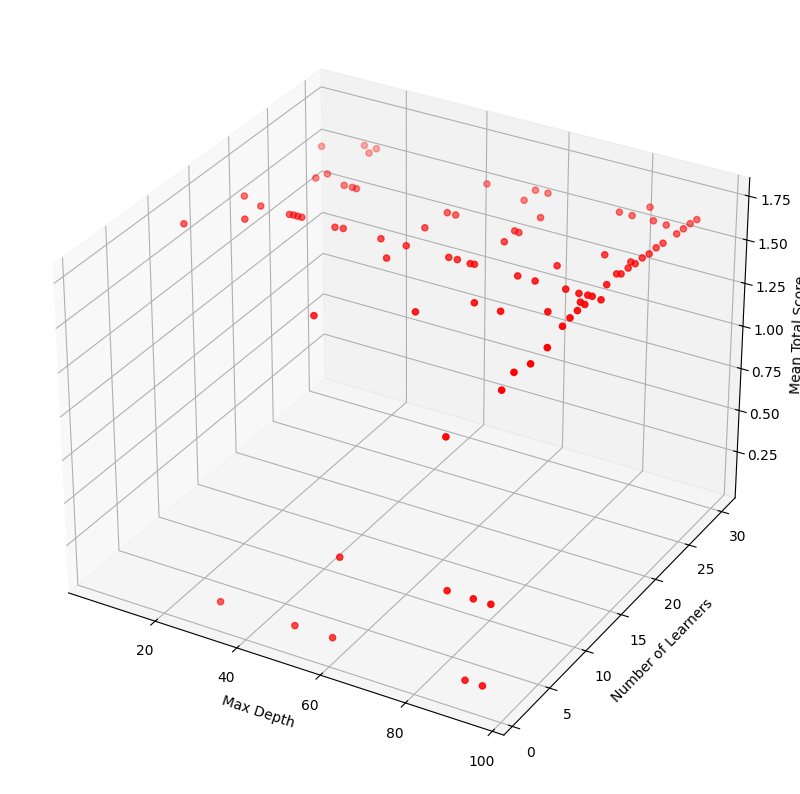

In [ ]:

print("Best Parameters: [93, 14]")
# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))
# Create a 3D plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()

In [ ]:
import plotly.graph_objects as go

# Create a 3D plot with plotly
fig = go.Figure()

# Scatter plot with smaller marker size
fig.add_trace(go.Scatter3d(
    x=mean_scores_array[:, 0],
    y=mean_scores_array[:, 1],
    z=list(mean_scores.values()),
    mode='markers',
    marker=dict(color='red', size=1),  # Adjust the size parameter
    text=[f'Max Depth: {md}, Num Learners: {nl}, Mean Total Score: {score:.2f}' for md, nl, score in zip(mean_scores_array[:, 0], mean_scores_array[:, 1], mean_scores.values())],
))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis_title='Max Depth',
        yaxis_title='Number of Learners',
        zaxis_title='Mean Total Score',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title='3D Plot of Mean Total Score',
)

# Save the plot as an HTML file
fig.write_html('3d_plot_XGB.html')

In [ ]:

max_depth = 93
n_learners = 14

# Create XGBoost model with specified hyperparameters
model = XGBClassifier(
    # device = "cuda",
    n_estimators=n_learners,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1  # Utilize all available CPU cores
)
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

start_time = time.time()
# Evaluate the model using cross-validation
y_pred = cross_val_predict(model, scaled, y_true, cv=stratified_kfold, n_jobs=-1)

# Calculate recall and precision
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

elapsed_time = time.time() - start_time

# Calculate total score
total_score = recall + precision - 0.001 * elapsed_time

In [ ]:
    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, recall = {recall}, precision = {precision}, elapsed_time = {elapsed_time}, total_score = {total_score})")

(max depth:93, n_learner: 14, recall = 0.9179940072543763, precision = 0.9234012770857688, elapsed_time = 120.5033745765686, total_score = 1.7208919097635764)


## f1 Score-a*time

### Random Forest

(max depth:140, n_learner: 40, f1_score = 0.9478975723485761, elapsed_time = 39.68721294403076, total_score = 0.7494615076284222)
(max depth:135, n_learner: 33, f1_score = 0.9469896029734685, elapsed_time = 12.281240701675415, total_score = 0.8855833994650913)
(max depth:9, n_learner: 79, f1_score = 0.5102817432919902, elapsed_time = 9.068052768707275, total_score = 0.46494147944845376)
(max depth:131, n_learner: 49, f1_score = 0.9479477145094608, elapsed_time = 16.65209698677063, total_score = 0.8646872295756076)
(max depth:54, n_learner: 75, f1_score = 0.9475147507166425, elapsed_time = 25.109569787979126, total_score = 0.8219669017767468)
(max depth:29, n_learner: 64, f1_score = 0.9258568399346173, elapsed_time = 14.427987098693848, total_score = 0.8537169044411481)
(max depth:55, n_learner: 30, f1_score = 0.9456734223442356, elapsed_time = 9.265660285949707, total_score = 0.899345120914487)
(max depth:60, n_learner: 108, f1_score = 0.94810822578565, elapsed_time = 46.99698734283447

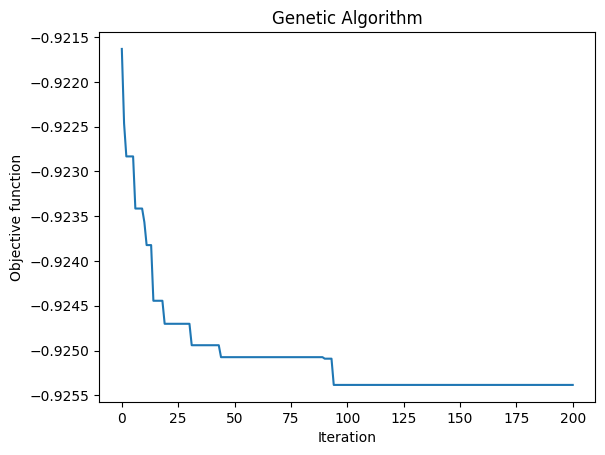

Best Parameters: [79.  8.]


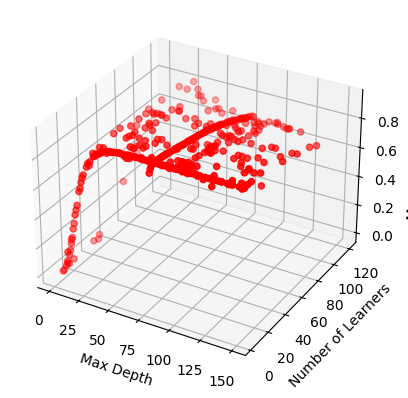

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[1, 150], [1, 120]])

# Store mean total score for each combination of max_depth and n_learners
total_score_mean = {}

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0])
    n_learners = int(params[1])

    # Create RandomForest model with specified hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_learners,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1  # Utilize all available CPU cores
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    y_true = df['Cid']
    y_pred = cross_val_predict(model, data_combined, y_true, cv=stratified_kfold, n_jobs=-1)

    # Calculate f1 score
    f1score = f1_score(y_true, y_pred, average='weighted')

    elapsed_time = time.time() - start_time

    # Calculate total score
    total_score = f1score - 0.005 * elapsed_time

    # Update mean total score for the current combination of max_depth and n_learners
    key = (max_depth, n_learners)
    if key in total_score_mean:
        total_score_mean[key].append(total_score)
    else:
        total_score_mean[key] = [total_score]

    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, f1_score = {f1score}, elapsed_time = {elapsed_time}, total_score = {total_score})")
    return -total_score

algorithm_param = {'max_num_iteration': 200,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

saveobj(total_score_mean, 'tsm_RF_f1_200_20')
saveobj(model, 'model_rf_f1_200_20')

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()


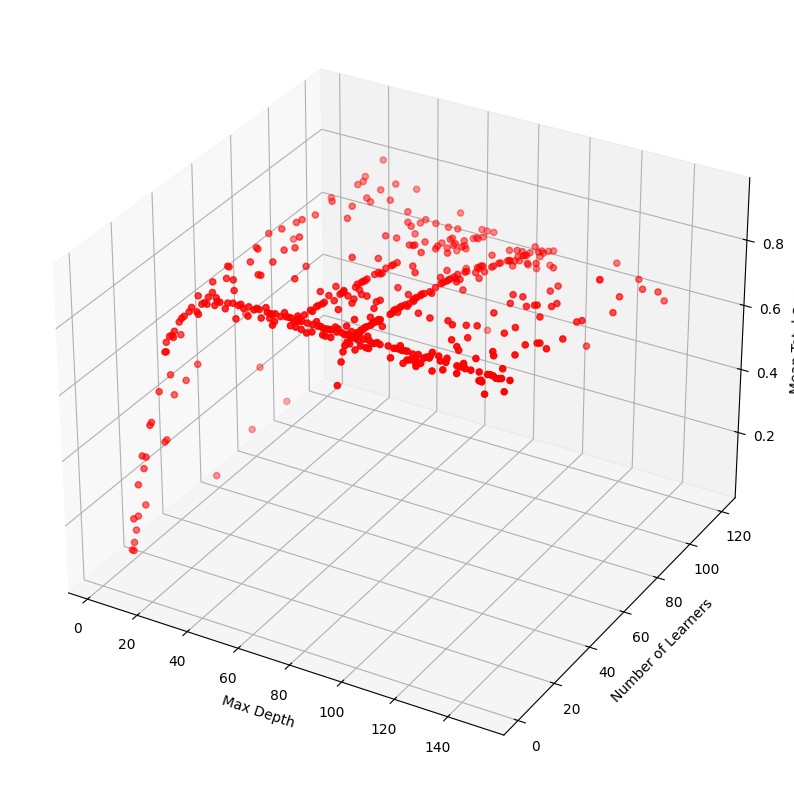

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()

In [ ]:
import plotly.graph_objects as go

# Create a 3D plot with plotly
fig = go.Figure()

# Scatter plot with smaller marker size
fig.add_trace(go.Scatter3d(
    x=mean_scores_array[:, 0],
    y=mean_scores_array[:, 1],
    z=list(mean_scores.values()),
    mode='markers',
    marker=dict(color='red', size=1),  # Adjust the size parameter
    text=[f'Max Depth: {md}, Num Learners: {nl}, Mean Total Score: {score:.2f}' for md, nl, score in zip(mean_scores_array[:, 0], mean_scores_array[:, 1], mean_scores.values())],
))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis_title='Max Depth',
        yaxis_title='Number of Learners',
        zaxis_title='Mean Total Score',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title='3D Plot of Mean Total Score',
)

# Save the plot as an HTML file
fig.write_html('3d_plot_RF_f1.html')


### ADABoost

(max depth:51, n_learner: 22, f1_score = 0.9437335958731178, elapsed_time = 75.98031258583069, total_score = 0.9057434395802024)
(max depth:57, n_learner: 36, f1_score = 0.9451517175923955, elapsed_time = 131.41307425498962, total_score = 0.8794451804649006)
(max depth:35, n_learner: 27, f1_score = 0.8734400461455554, elapsed_time = 68.55470943450928, total_score = 0.8391626914283007)
(max depth:94, n_learner: 38, f1_score = 0.9341270234197984, elapsed_time = 150.35977864265442, total_score = 0.8589471340984711)
(max depth:28, n_learner: 21, f1_score = 0.7423423731041776, elapsed_time = 49.00285720825195, total_score = 0.7178409445000516)
(max depth:40, n_learner: 7, f1_score = 0.8427334326368008, elapsed_time = 19.73311758041382, total_score = 0.8328668738465939)
(max depth:58, n_learner: 19, f1_score = 0.9440881364347891, elapsed_time = 70.15463399887085, total_score = 0.9090108194353537)
(max depth:99, n_learner: 32, f1_score = 0.9369750923231388, elapsed_time = 121.51479196548462, 

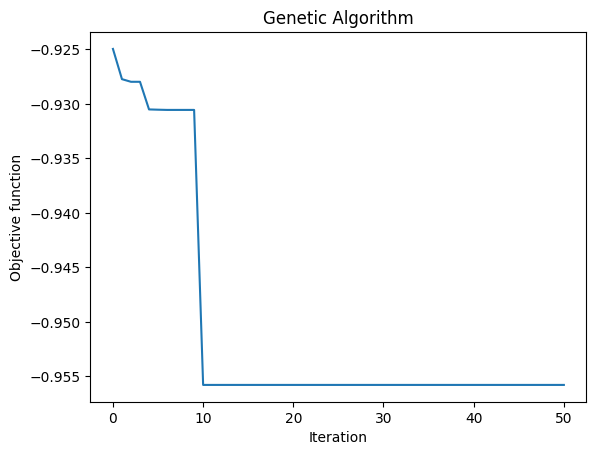

Best Parameters: [86.  6.]


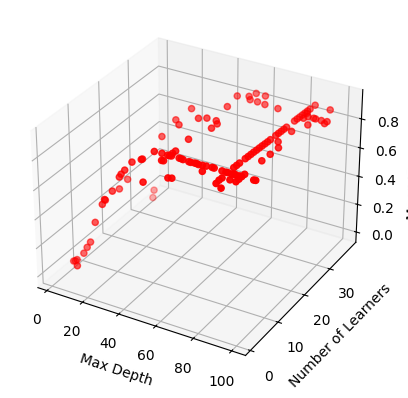

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import recall_score, precision_score

warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[1, 100], [1, 40]])

# Store mean total score for each combination of max_depth and n_learners
total_score_mean = {}

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0])
    n_learners = int(params[1])

    # Create RandomForest model with specified hyperparameters
    base_estimator = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model = AdaBoostClassifier(
        n_estimators=n_learners,
        estimator=base_estimator,
        algorithm='SAMME.R',
        random_state=42,
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    y_true = df['Cid']
    y_pred = cross_val_predict(model, data_combined, y_true, cv=stratified_kfold, n_jobs=-1)

    # Calculate f1 score
    f1score = f1_score(y_true, y_pred, average='weighted')

    elapsed_time = time.time() - start_time

    # Calculate total score
    total_score = f1score - 0.0005 * elapsed_time

    # Update mean total score for the current combination of max_depth and n_learners
    key = (max_depth, n_learners)
    if key in total_score_mean:
        total_score_mean[key].append(total_score)
    else:
        total_score_mean[key] = [total_score]

    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, f1_score = {f1score}, elapsed_time = {elapsed_time}, total_score = {total_score})")
    return -total_score

algorithm_param = {'max_num_iteration': 50,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

saveobj(model, 'model_ADA_f1_50_20')
saveobj(total_score_mean, 'tsm_ADA_f1_50_20')

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()

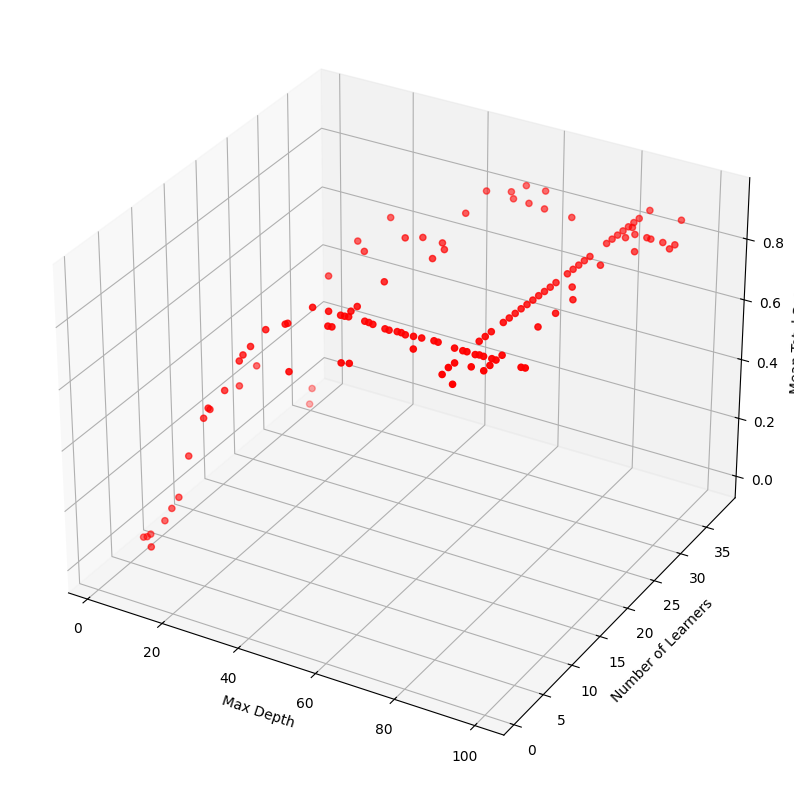

In [16]:
# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))
# Create a 3D plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()

In [17]:
import plotly.graph_objects as go

# Create a 3D plot with plotly
fig = go.Figure()

# Scatter plot with smaller marker size
fig.add_trace(go.Scatter3d(
    x=mean_scores_array[:, 0],
    y=mean_scores_array[:, 1],
    z=list(mean_scores.values()),
    mode='markers',
    marker=dict(color='red', size=1),  # Adjust the size parameter
    text=[f'Max Depth: {md}, Num Learners: {nl}, Mean Total Score: {score:.2f}' for md, nl, score in zip(mean_scores_array[:, 0], mean_scores_array[:, 1], mean_scores.values())],
))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis_title='Max Depth',
        yaxis_title='Number of Learners',
        zaxis_title='Mean Total Score',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title='3D Plot of Mean Total Score',
)

# Save the plot as an HTML file
fig.write_html('3d_plot_ADA_f1.html')

### XGBoost

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
y = df['Cid']
le = LabelEncoder()
le.fit(y)
le.transform(y)
y_true =  le.transform(y)

scaler = StandardScaler()
scaled = scaler.fit_transform(data_combined)

(max depth:39, n_learner: 19, f1_score = 0.9322695634967877, elapsed_time = 162.3446924686432, total_score = 0.8510972172624661)
(max depth:63, n_learner: 23, f1_score = 0.9359690912138351, elapsed_time = 190.10094141960144, total_score = 0.8409186205040344)
(max depth:74, n_learner: 9, f1_score = 0.8597638113740399, elapsed_time = 65.08321380615234, total_score = 0.8272222044709637)
(max depth:82, n_learner: 14, f1_score = 0.9175065762594431, elapsed_time = 109.23907470703125, total_score = 0.8628870389059274)
(max depth:47, n_learner: 15, f1_score = 0.9218031703446631, elapsed_time = 116.68131637573242, total_score = 0.8634625121567969)
(max depth:96, n_learner: 1, f1_score = 0.02727978893467532, elapsed_time = 6.532747745513916, total_score = 0.024013415061918363)
(max depth:75, n_learner: 9, f1_score = 0.8597638113740399, elapsed_time = 65.03782486915588, total_score = 0.827244898939462)
(max depth:21, n_learner: 26, f1_score = 0.9377475636351971, elapsed_time = 213.35239148139954,

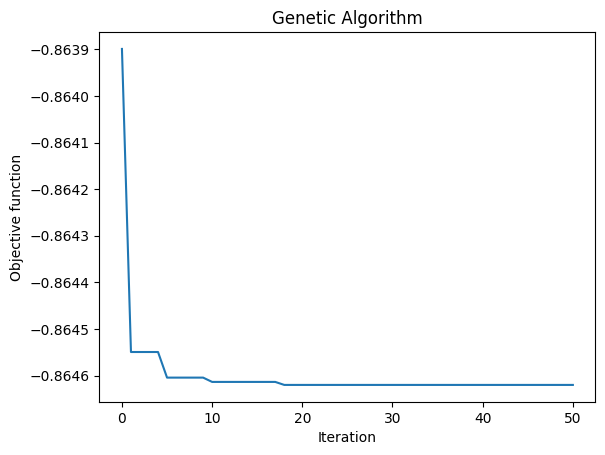

Best Parameters: [64. 14.]


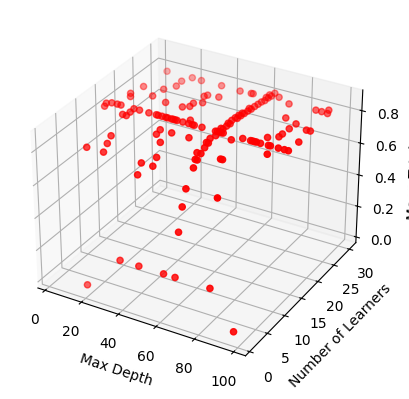

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import recall_score, precision_score, f1_score


warnings.filterwarnings("ignore")

# Assuming you have 'data_combined' and 'df' defined somewhere in your code

# Define the search space
varbound = np.array([[1, 100], [1, 30]])

# Store mean total score for each combination of max_depth and n_learners
total_score_mean = {}

# Define the fitness function
def fitness_function(params):
    max_depth = int(params[0])
    n_learners = int(params[1])

    # Create XGBoost model with specified hyperparameters
    model = XGBClassifier(
        # device = "cuda",
        n_estimators=n_learners,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1  # Utilize all available CPU cores
    )
    stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    start_time = time.time()
    # Evaluate the model using cross-validation
    y_pred = cross_val_predict(model, scaled, y_true, cv=stratified_kfold, n_jobs=-1)

    # Calculate f1 score
    f1score = f1_score(y_true, y_pred, average='weighted')

    elapsed_time = time.time() - start_time

    # Calculate total score
    total_score = f1score - 0.0005 * elapsed_time

    # Update mean total score for the current combination of max_depth and n_learners
    key = (max_depth, n_learners)
    if key in total_score_mean:
        total_score_mean[key].append(total_score)
    else:
        total_score_mean[key] = [total_score]

    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, f1_score = {f1score}, elapsed_time = {elapsed_time}, total_score = {total_score})")
    return -total_score

algorithm_param = {'max_num_iteration': 50,
                   'population_size': 20,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Create an instance of the geneticalgorithm algorithm class
model = ga(function=fitness_function, dimension=2, variable_type='int', variable_boundaries=varbound, function_timeout=15*60,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

saveobj(model, 'model_XGB_f1_50_20')
saveobj(total_score_mean, 'tsm_XGB_f1_50_20')

# Get the best parameters and their corresponding scores and elapsed time
best_params = model.output_dict['variable']

# Print the best parameters, scores, and elapsed time
print("Best Parameters:", best_params)

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')-
ax.set_zlabel('Mean Total Score')

plt.show()


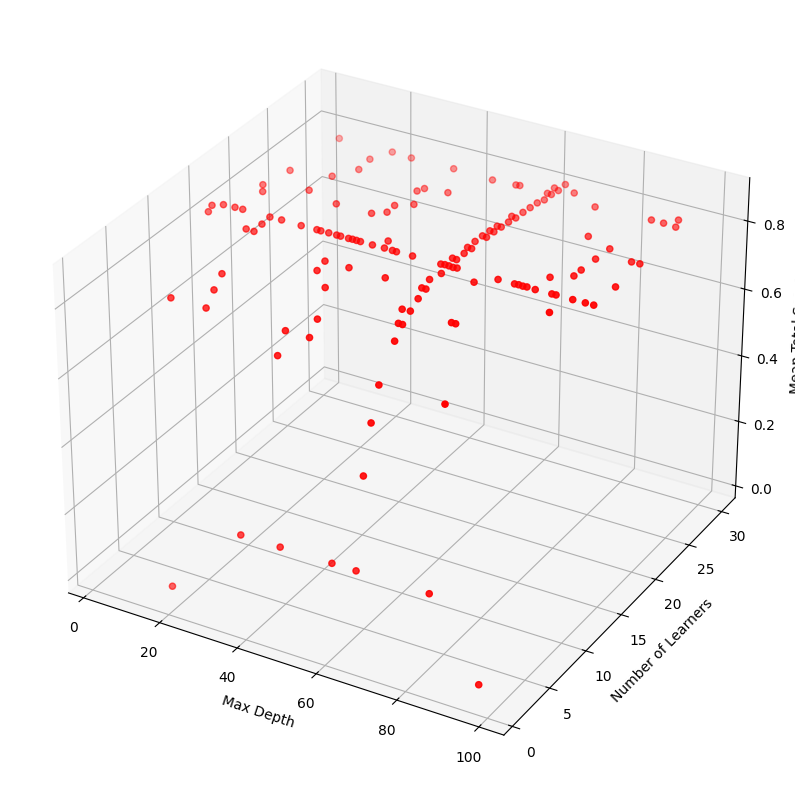

In [33]:

# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))
# Calculate mean total score for each combination of max_depth and n_learners
mean_scores = {(key[0], key[1]): np.mean(scores) for key, scores in total_score_mean.items()}

# Convert the mean_scores to a NumPy array for plotting
mean_scores_array = np.array(list(mean_scores.keys()))
# Create a 3D plot
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_scores_array[:, 0], mean_scores_array[:, 1], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Learners')
ax.set_zlabel('Mean Total Score')

plt.show()

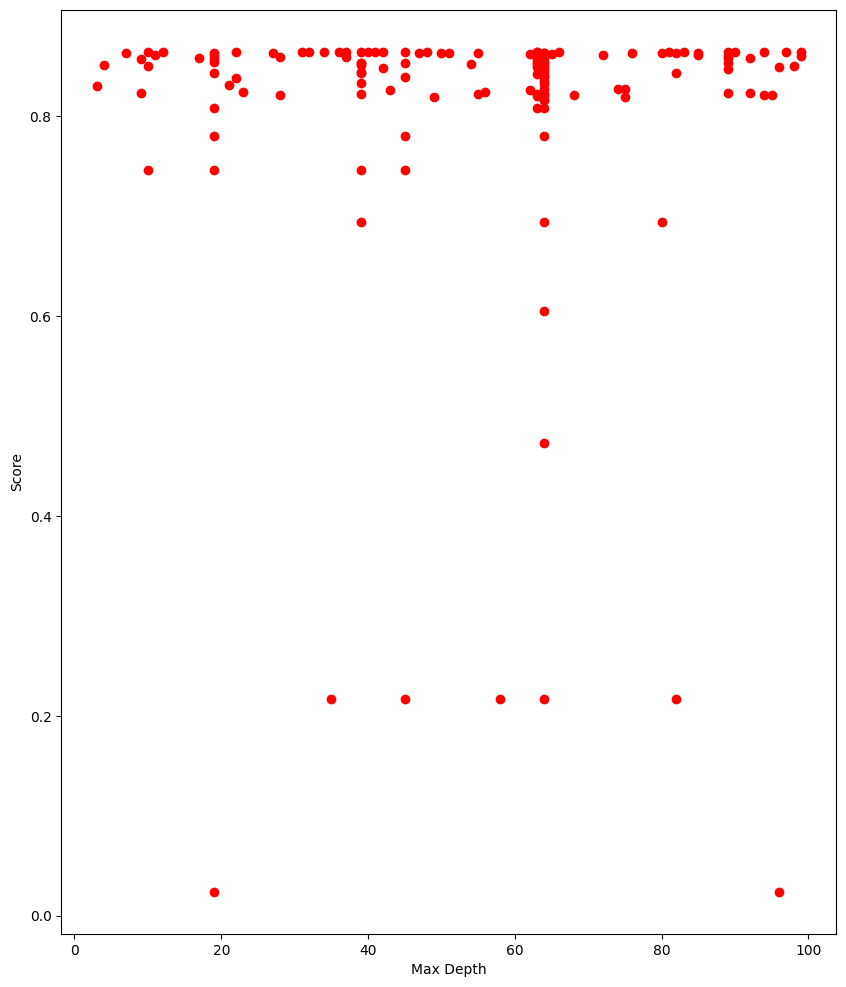

In [34]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.scatter(mean_scores_array[:, 0], list(mean_scores.values()), c='r', marker='o')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Score')

plt.show()

In [35]:
import plotly.graph_objects as go

# Create a 3D plot with plotly
fig = go.Figure()

# Scatter plot with smaller marker size
fig.add_trace(go.Scatter3d(
    x=mean_scores_array[:, 0],
    y=mean_scores_array[:, 1],
    z=list(mean_scores.values()),
    mode='markers',
    marker=dict(color='red', size=1),  # Adjust the size parameter
    text=[f'Max Depth: {md}, Num Learners: {nl}, Mean Total Score: {score:.2f}' for md, nl, score in zip(mean_scores_array[:, 0], mean_scores_array[:, 1], mean_scores.values())],
))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis_title='Max Depth',
        yaxis_title='Number of Learners',
        zaxis_title='Mean Total Score',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title='3D Plot of Mean Total Score',
)

# Save the plot as an HTML file
fig.write_html('3d_plot_XGB.html')

In [ ]:

max_depth = 93
n_learners = 14

# Create XGBoost model with specified hyperparameters
model = XGBClassifier(
    # device = "cuda",
    n_estimators=n_learners,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1  # Utilize all available CPU cores
)
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

start_time = time.time()
# Evaluate the model using cross-validation
y_pred = cross_val_predict(model, scaled, y_true, cv=stratified_kfold, n_jobs=-1)

# Calculate recall and precision
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

elapsed_time = time.time() - start_time

# Calculate total score
total_score = recall + precision - 0.001 * elapsed_time

In [ ]:
    # Return the negative mean total score as the fitness value (since geneticalgorithm minimizes)
    print(f"(max depth:{max_depth}, n_learner: {n_learners}, recall = {recall}, precision = {precision}, elapsed_time = {elapsed_time}, total_score = {total_score})")

(max depth:93, n_learner: 14, recall = 0.9179940072543763, precision = 0.9234012770857688, elapsed_time = 120.5033745765686, total_score = 1.7208919097635764)
